<h1 style="color: #7E99A3;">Pizza Sales Analysis</h1>

<h2 style="color: #A5BFCC;">Installing Libraries</h2>

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import squarify

<h2 style="color: #A5BFCC;">Importing Datasets</h2>

In [528]:
df = pd.read_csv('Dataset/pizza_sales.csv')

<h2 style="color: #A5BFCC;">Understanding the Dataset</h2>

In [529]:
# Total rows and columns in the dataset
df.shape

(48620, 12)

In [530]:
# Column names in the dataset
columns = df.columns
columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [531]:
# first 5 entries of the database
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1-1-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1-1-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1-1-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1-1-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1-1-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [532]:
# last 5 entries of the database
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620.0,21350.0,bbq_ckn_s,1.0,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [533]:
# Information about the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [534]:
# non null values in each column
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [535]:
# Number of duplicate columns
df.duplicated().sum()

0

In [536]:
# Description of the database
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


<h2 style="color: #A5BFCC;">Understanding the Pizza Categories</h2>

In [537]:
# unique Pizza categories
unique_category = df['pizza_category'].unique()
unique_category

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [538]:
# Count of unique categories
category_counts = df['pizza_category'].value_counts()
print(category_counts)

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64


In [539]:
# Percentage of unique categories
category_percentages = df['pizza_category'].value_counts(normalize=True) * 100
print(category_percentages)

pizza_category
Classic    29.985603
Supreme    24.222542
Veggie     23.547923
Chicken    22.243933
Name: proportion, dtype: float64


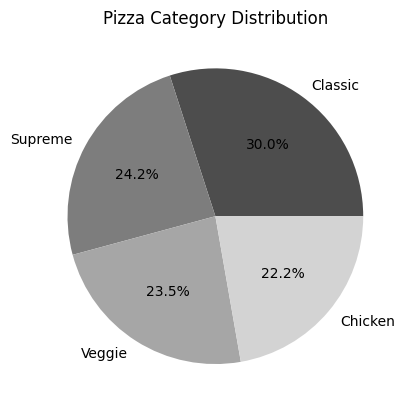

In [540]:
# pie chart showing distribution of pizza category
df['pizza_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#4D4D4D', '#7D7D7D', '#A6A6A6', '#D3D3D3'])
plt.title("Pizza Category Distribution")
plt.ylabel("") 
plt.show()


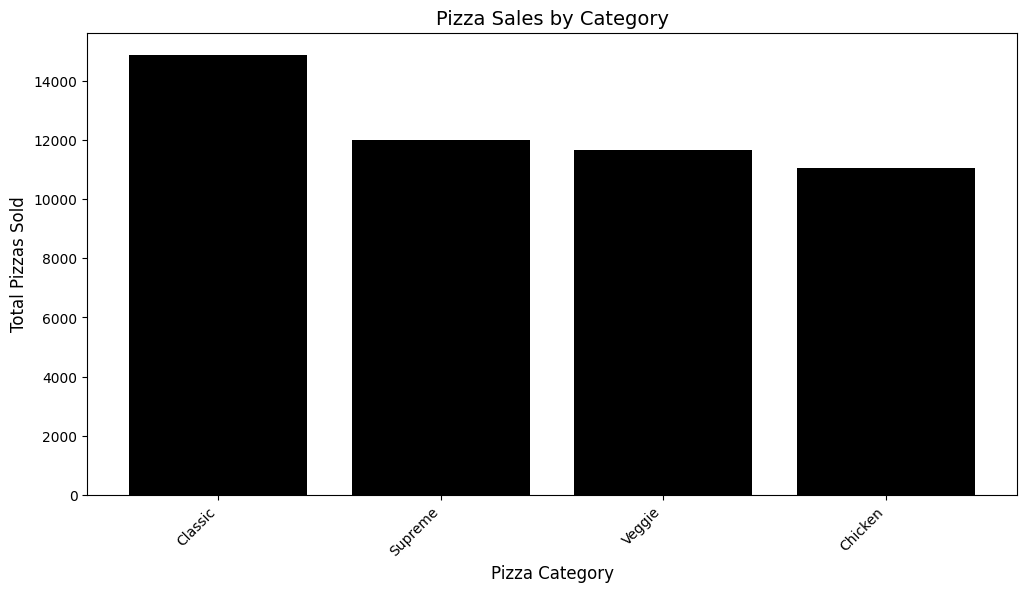

In [541]:
plt.figure(figsize=(12, 6))
plt.bar(category_sales['pizza_category'], category_sales['quantity'], color='black')

plt.xlabel("Pizza Category", fontsize=12)
plt.ylabel("Total Pizzas Sold", fontsize=12)
plt.title("Pizza Sales by Category", fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()


<h2 style="color: #A5BFCC;">Understanding the Pizza Sizes</h2>

In [542]:
# unique pizza sizes
unique_size = df['pizza_size'].unique()
unique_size

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [543]:
# Count of unique sizes
size_counts = df['pizza_size'].value_counts()
print(size_counts)

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64


In [544]:
# Percentage of unique sizes
size_percentages = df['pizza_size'].value_counts(normalize=True) * 100
print(size_percentages)

pizza_size
L      38.103661
M      31.643357
S      29.076512
XL      1.118881
XXL     0.057589
Name: proportion, dtype: float64


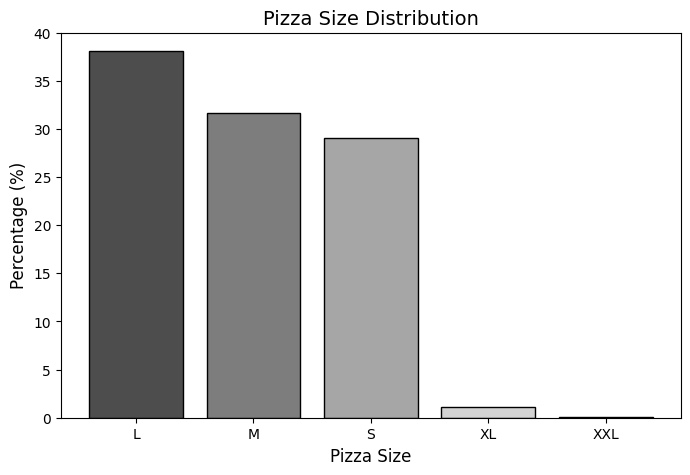

In [545]:
# pie chart showing distribution of pizza sizes
labels = ['L', 'M', 'S', 'XL', 'XXL']
sizes = [38.103661, 31.643357, 29.076512, 1.118881, 0.057589]
grey_shades = ['#4D4D4D', '#7D7D7D', '#A6A6A6', '#D3D3D3', '#EAEAEA']

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=grey_shades, edgecolor='black')

plt.xlabel("Pizza Size", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Pizza Size Distribution", fontsize=14)
plt.show()


<h2 style="color: #A5BFCC;">Understanding the pizza's available in menu</h2>

In [546]:
# Get unique pizza names
unique_name = df['pizza_name'].unique()

# Clean the names by removing "The " and " Pizza"
pizza_names_cleaned = [name.replace("The ", "").replace(" Pizza", "") for name in unique_name]

# Print each cleaned name on a new line
for name in pizza_names_cleaned:
    print(name)
print('\n')
unique_name_count = df['pizza_name'].nunique()
print("Total Unique Pizza Names:", unique_name_count)

Hawaiian
Classic Deluxe
Five Cheese
Italian Supreme
Mexicana
Thai Chicken
Prosciutto and Arugula
Barbecue Chicken
Greek
Spinach Supreme
Green Garden
Italian Capocollo
Spicy Italian
Spinach Pesto
Vegetables + Vegetables
Southwest Chicken
California Chicken
Pepperoni
Chicken Pesto
Big Meat
Soppressata
Four Cheese
Napolitana
Calabrese
Italian Vegetables
Mediterranean
PepperSalami
Spinach and Feta
Sicilian
Chicken Alfredo
Pepperoni, Mushroom, and Peppers
Brie Carre


Total Unique Pizza Names: 32


In [547]:
# Count occurrences of unique pizza names
name_counts = df['pizza_name'].value_counts()

cleaned_names = name_counts.rename(lambda x: x.replace("The ", "").replace(" Pizza", ""))

total_orders = name_counts.sum()
percentages = (name_counts / total_orders) * 100

name_counts_df = pd.DataFrame({'Pizza Name': cleaned_names.index, 'Order Count': cleaned_names.values, 'Percentage': percentages.values})
name_counts_df['Percentage'] = name_counts_df['Percentage'].map(lambda x: f"{x:.2f}%")

# Print in a structured table format
print(name_counts_df.to_string(index=False))

                      Pizza Name  Order Count Percentage
                  Classic Deluxe         2416      4.97%
                Barbecue Chicken         2372      4.88%
                        Hawaiian         2370      4.87%
                       Pepperoni         2369      4.87%
                    Thai Chicken         2315      4.76%
              California Chicken         2302      4.73%
                        Sicilian         1887      3.88%
                   Spicy Italian         1887      3.88%
               Southwest Chicken         1885      3.88%
                     Four Cheese         1850      3.81%
                 Italian Supreme         1849      3.80%
                        Big Meat         1811      3.72%
         Vegetables + Vegetables         1510      3.11%
                        Mexicana         1456      2.99%
                      Napolitana         1451      2.98%
                Spinach and Feta         1432      2.95%
          Prosciutto and Arugul

In [548]:
# top 5 most sold pizzas and least 5 most sold pizzas

pizza_sales = df.groupby('pizza_name')['order_id'].count().reset_index()
pizza_sales.rename(columns={'order_id': 'total_orders'}, inplace=True)

pizza_sales = pizza_sales.sort_values(by='total_orders', ascending=False)

top_5_pizzas = pizza_sales.head(5).reset_index(drop=True)
bottom_5_pizzas = pizza_sales.tail(5).reset_index(drop=True)

print("Top 5 Most Sold Pizzas")
print(top_5_pizzas)

print("\nBottom 5 Least Sold Pizzas")
print(bottom_5_pizzas)


Top 5 Most Sold Pizzas
                   pizza_name  total_orders
0    The Classic Deluxe Pizza          2416
1  The Barbecue Chicken Pizza          2372
2          The Hawaiian Pizza          2370
3         The Pepperoni Pizza          2369
4      The Thai Chicken Pizza          2315

Bottom 5 Least Sold Pizzas
                  pizza_name  total_orders
0    The Spinach Pesto Pizza           957
1  The Spinach Supreme Pizza           940
2        The Calabrese Pizza           927
3    The Mediterranean Pizza           923
4       The Brie Carre Pizza           480


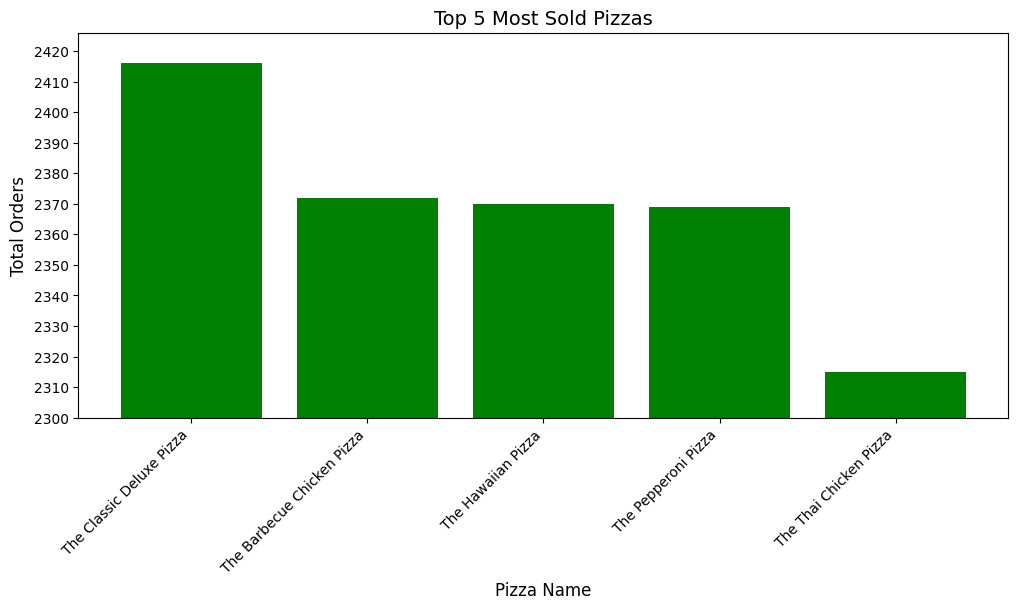

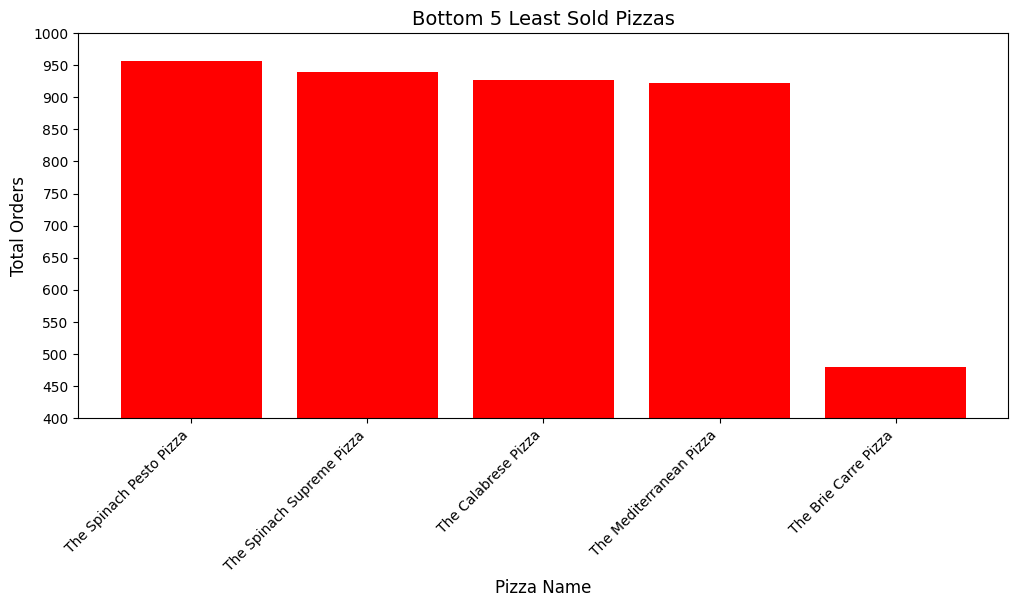

In [549]:
def set_y_ticks(start, end, step):
    return np.arange(start, end + step, step)

# Plot Top 5 Most Sold Pizzas
plt.figure(figsize=(12, 5))
plt.bar(top_5_pizzas['pizza_name'], top_5_pizzas['total_orders'], color='green')
plt.xlabel("Pizza Name", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.title("Top 5 Most Sold Pizzas", fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.ylim(2300, top_5_pizzas['total_orders'].max() + 10)
plt.yticks(set_y_ticks(2300, top_5_pizzas['total_orders'].max(), 10))

plt.show()

# Plot Bottom 5 Least Sold Pizzas
plt.figure(figsize=(12, 5))
plt.bar(bottom_5_pizzas['pizza_name'], bottom_5_pizzas['total_orders'], color='red')
plt.xlabel("Pizza Name", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.title("Bottom 5 Least Sold Pizzas", fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.ylim(400, 1000)
plt.yticks(set_y_ticks(400, 1000, 50))

plt.show()


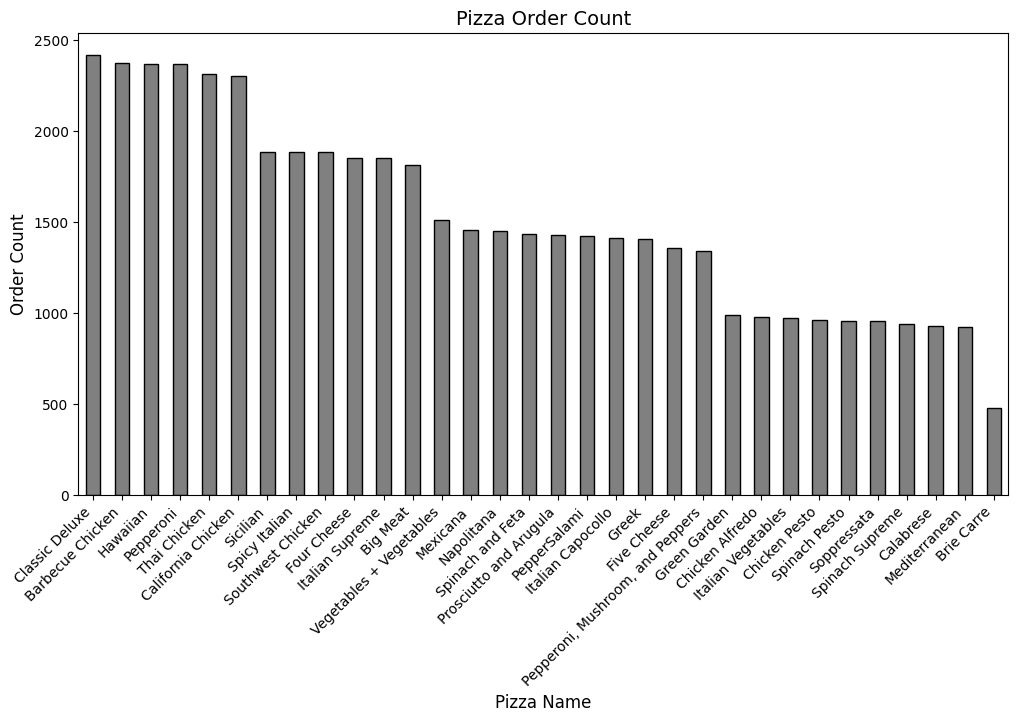

In [550]:
# Count occurrences of unique pizza names
name_counts = df['pizza_name'].value_counts()

cleaned_names = name_counts.rename(lambda x: x.replace("The ", "").replace(" Pizza", ""))

# Plot bar chart
plt.figure(figsize=(12, 6))
cleaned_names.plot(kind='bar', color='gray', edgecolor='black')

plt.xlabel("Pizza Name", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.title("Pizza Order Count", fontsize=14)
plt.xticks(rotation=45, ha="right")

plt.show()


<h2 style="color: #A5BFCC;">Understanding the Ingredients used in the pizza</h2>

In [551]:
# Split ingredients by comma and flatten into a single list
all_ingredients = df['pizza_ingredients'].str.split(', ').explode()

# Get unique ingredients
unique_ingredients = all_ingredients.unique()

# Sort and print them
unique_ingredients.sort()
for ingredient in unique_ingredients:
    print(ingredient)


Alfredo Sauce
Anchovies
Artichoke
Artichokes
Arugula
Asiago Cheese
Bacon
Barbecue Sauce
Barbecued Chicken
Beef Chuck Roast
Blue Cheese
Brie Carre Cheese
Calabrese Salami
Capocollo
Caramelized Onions
Chicken
Chipotle Sauce
Chorizo Sausage
Cilantro
Coarse SicilianSalami
Corn
Eggplant
Feta Cheese
Fontina Cheese
Friggitello Peppers
Garlic
GenoaSalami
Goat Cheese
Gorgonzola Piccante Cheese
Gouda Cheese
Green Olives
Green Peppers
Italian Sausage
Jalapeno Peppers
Kalamata Olives
Luganega Sausage
Mozzarella Cheese
Mushrooms
Onions
Oregano
Pancetta
Parmigiano Reggiano Cheese
Pears
Peperoncini verdi
Pepperoni
Pesto Sauce
Pineapple
Plum Tomatoes
Prosciutto
Prosciutto di San Daniele
Provolone Cheese
Red Onions
Red Peppers
Ricotta Cheese
Romano Cheese
Salami
Sliced Ham
Smoked Gouda Cheese
SoppressataSalami
Spinach
Sun-dried Tomatoes
Thai Sweet Chilli Sauce
Thyme
Tomatoes
Zucchini


In [552]:
from tabulate import tabulate

all_ingredients = df['pizza_ingredients'].str.split(', ').explode()

# Count
ingredient_counts = all_ingredients.value_counts()

# Percentage
total_ingredients = ingredient_counts.sum()
ingredient_percentages = (ingredient_counts / total_ingredients) * 100

# Create DataFrame
ingredient_df = pd.DataFrame({
    'Ingredient': ingredient_counts.index,
    'Count': ingredient_counts.values,
    'Percentage': ingredient_percentages.values
})

ingredient_df['Percentage'] = ingredient_df['Percentage'].map(lambda x: f"{x:.2f}%")
print(tabulate(ingredient_df, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════════╤═════════╤══════════════╕
│    │ Ingredient                 │   Count │ Percentage   │
╞════╪════════════════════════════╪═════════╪══════════════╡
│  0 │ Garlic                     │   27422 │ 10.25%       │
├────┼────────────────────────────┼─────────┼──────────────┤
│  1 │ Tomatoes                   │   26601 │ 9.94%        │
├────┼────────────────────────────┼─────────┼──────────────┤
│  2 │ Red Onions                 │   19547 │ 7.31%        │
├────┼────────────────────────────┼─────────┼──────────────┤
│  3 │ Red Peppers                │   16284 │ 6.09%        │
├────┼────────────────────────────┼─────────┼──────────────┤
│  4 │ Mozzarella Cheese          │   10333 │ 3.86%        │
├────┼────────────────────────────┼─────────┼──────────────┤
│  5 │ Pepperoni                  │   10300 │ 3.85%        │
├────┼────────────────────────────┼─────────┼──────────────┤
│  6 │ Spinach                    │   10012 │ 3.74%        │
├────┼──────────────────

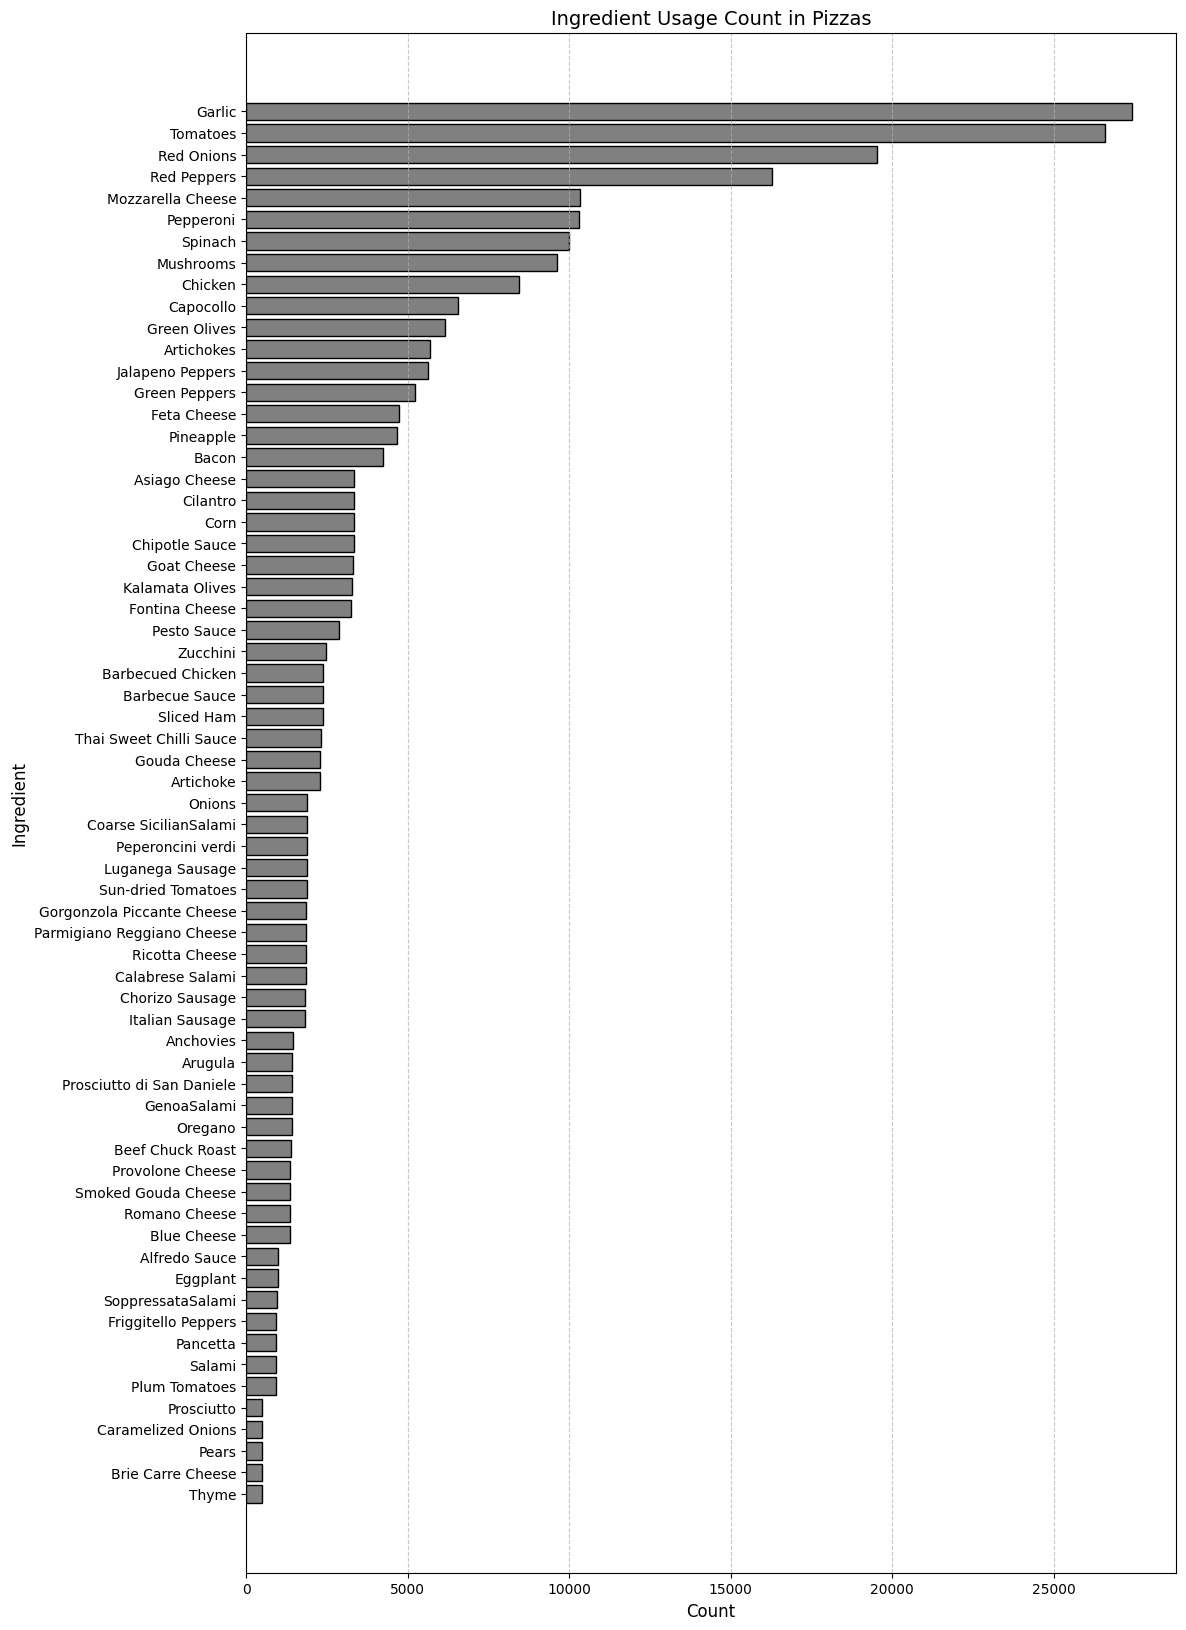

In [553]:
ingredient_df = ingredient_df.sort_values(by="Count", ascending=True)

# Set figure size
plt.figure(figsize=(12, 20))  # Adjust height for better readability

# horizontal bar chart
plt.barh(ingredient_df["Ingredient"], ingredient_df["Count"], color="gray", edgecolor="black")

plt.xlabel("Count", fontsize=12)
plt.ylabel("Ingredient", fontsize=12)
plt.title("Ingredient Usage Count in Pizzas", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


<h2 style="color: #A5BFCC;">Order Count over the date and weekly trend over the year</h2>

In [554]:
# Order count by date
order_counts = df.groupby('order_date')['order_id'].count().reset_index()
order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)
print(order_counts)

    order_date  order_count
0     1-1-2015          161
1    1-10-2015          190
2    1-11-2015          123
3    1-12-2015          129
4     1-2-2015          188
..         ...          ...
353   9-5-2015          140
354   9-6-2015          145
355   9-7-2015          133
356   9-8-2015          124
357   9-9-2015          154

[358 rows x 2 columns]


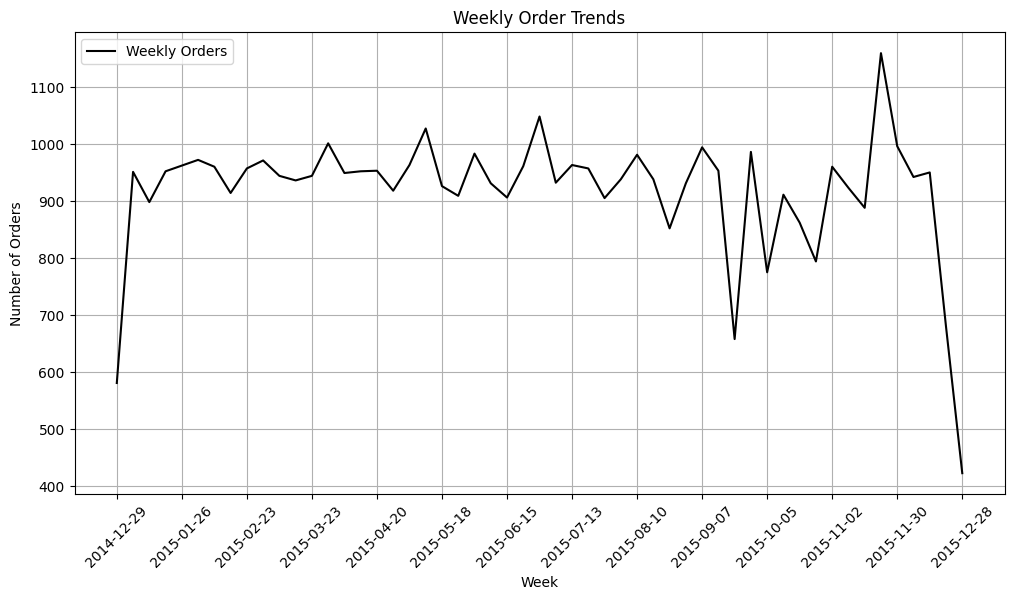

In [555]:
# line graph for order date with weekly smoothing

df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

df['week'] = df['order_date'] - pd.to_timedelta(df['order_date'].dt.dayofweek, unit='D')

weekly_orders = df.groupby('week')['order_id'].count().reset_index()
weekly_orders.rename(columns={'order_id': 'order_count'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(weekly_orders['week'], weekly_orders['order_count'], linestyle='-', color='black', marker='', label='Weekly Orders')

plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.title('Weekly Order Trends')

plt.xticks(weekly_orders['week'][::4].dt.strftime('%Y-%m-%d'), rotation=45)  # Show every 4th week for readability
plt.legend()
plt.grid(True)
plt.show()


<h2 style="color: #A5BFCC;">Date with least orders and Date with most orders and Average Orders over the year</h2>

In [556]:
# minimum order date, maximum order date and average order per day

order_counts = df.groupby('order_date')['order_id'].count().reset_index()
order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

order_counts['order_date'] = pd.to_datetime(order_counts['order_date']).dt.date

most_orders = order_counts.loc[order_counts['order_count'].idxmax()]
least_orders = order_counts.loc[order_counts['order_count'].idxmin()]
average_orders = order_counts['order_count'].mean()

summary_table = pd.DataFrame({
    'Metric': ['Most Orders', 'Least Orders', 'Average Orders'],
    'Date': [most_orders['order_date'], least_orders['order_date'], 'N/A'],
    'Order Count': [most_orders['order_count'], least_orders['order_count'], round(average_orders, 2)]
})

print(summary_table)


           Metric        Date  Order Count
0     Most Orders  2015-11-26       261.00
1    Least Orders  2015-12-30        73.00
2  Average Orders         N/A       135.81


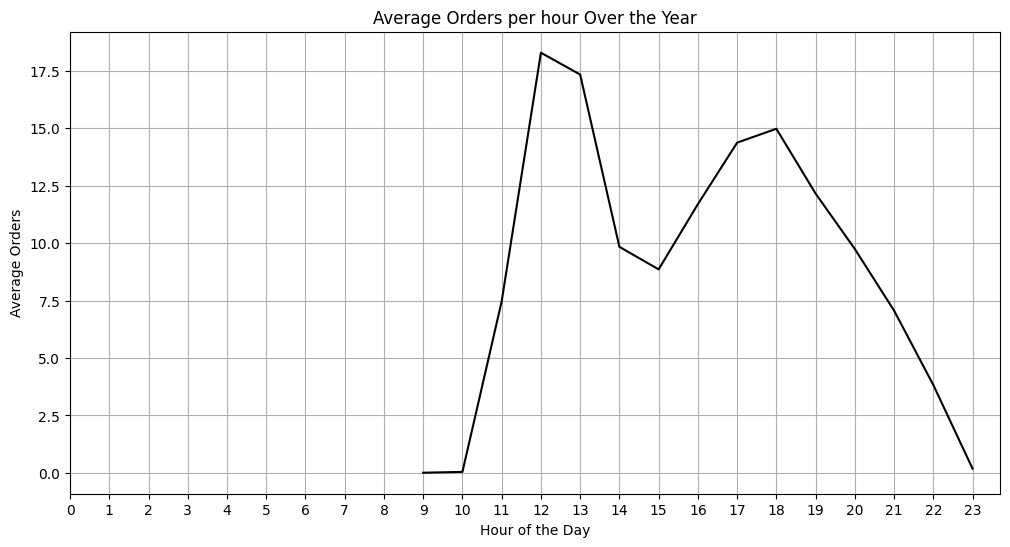

In [557]:
# average order count over the day for the entire year

df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.hour

hourly_orders = df.groupby('order_hour')['order_id'].count().reset_index()
hourly_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)

total_days = df['order_date'].nunique()
hourly_orders['average_orders'] = hourly_orders['total_orders'] / total_days

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(hourly_orders['order_hour'], hourly_orders['average_orders'], marker='', linestyle='-', color='black')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Orders')
plt.title('Average Orders per hour Over the Year')

plt.xticks(range(0, 24))  
plt.grid(True)
plt.show()


<h2 style="color: #A5BFCC;">Key Performance Indicators</h2>

In [558]:
total_revenue = df['total_price'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

total_orders = df['order_id'].nunique()

average_order_value = total_revenue / total_orders  

# Print the results
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${average_order_value:.2f}")


Total Revenue: $817860.05
Total Orders: 21350
Average Order Value: $38.31
